### Three Mirror Fabri-Perot Cavities
Three-mirror Fabry–Perot cavities (3MCs) exhibit richer and more tunable resonance structures than standard two-mirror cavities, due to the interference between their two sub-cavities.

<p align="center">
  <img src="threemirrorcavity.png" width="500"/>
</p>

The corresponding wavefunctions are given by:

<p align="center">
  <img src="threemirrorwavefunctions.png" width="500"/>
</p>


https://ccahilla.github.io/fabryperot.html

### Elements of the Three-Mirror System


#### 1. Mirror Reflectivities and Transmissivities

Each mirror \( M_i \) has:

$$
R_i = \text{Power reflectivity}, \quad T_i = 1 - R_i = \text{Power transmissivity}
$$

Amplitude coefficients:

$$
r_i = \sqrt{R_i}, \quad t_i = \sqrt{1 - R_i}
$$

Typically:

$$
R_1 = R_3 > R_2 \quad \text{(middle mirror couples the subcavities)}
$$

---

#### 2. Subcavity Lengths

The three-mirror cavity is composed of two coupled subcavities:

$$
L_1 = \text{distance between } M_1 \text{ and } M_2 \\
L_2 = \text{distance between } M_2 \text{ and } M_3
$$

Each subcavity can resonate independently, and the coupling through M_2 gives rise to mode splitting.

---

#### 3. Phase Accumulation

The total optical phase accumulated over propagation is based on:

$$
k = \frac{2\pi \nu}{c}
$$

Relevant phase factors:

$$
e^{2ikL_1}, \quad e^{2ikL_2}, \quad e^{2ik(L_1 + L_2)}
$$

These enter into the transmission amplitude through interference between the two subcavities.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

Parameters:
$$
\lambda = 1064\,\text{nm}
$$

$$
L_1 = 1\,\text{m}, \quad L_2 = 3\,\text{m}
$$

$$
\Delta\nu \in [-155, 155]\,\text{MHz}
$$

$$
k = k_0 + \Delta k = \frac{2\pi}{c}(\nu_0 + \Delta\nu), \quad \text{where} \quad \nu_0 = \frac{c}{\lambda}
$$


In [83]:
#Constants + Parameters
c = 3e8                      
lambda0 = 1063.999e-9           
nu0 = c / lambda0            
k0 = 2 * np.pi / lambda0     

In [91]:
#Frequency detuning (Δν from -150 MHz to 150 MHz)
dnu = np.linspace(-200e6, 200e6, 1000)
nu = nu0+dnu
k = 2*np.pi*nu/c      

#Mirror reflectivities and transmissivities (same for all mirrors)
R = 0.9
T = 1-R
r = np.sqrt(R)
t = np.sqrt(T)

#Sub-cavity lengths
L1 = 1.0
L2 = 3.0


The transmitted field amplitude $t$ for a three-mirror Fabry-Perot cavity is given by:

$$
t = \frac{-t_1 t_2 t_3 \, e^{i k (L_1 + L_2)}}{e^{2i k (L_1 + L_2)} - r_1 r_2 \, e^{2i k L_2} - r_2 r_3 \, e^{2i k L_1} + r_1 r_3 (r_2^2 + t_2^2)}
$$

Where:
- $r_i$ is the amplitude reflectivity of mirror $i$  
- $t_i$ is the amplitude transmissivity of mirror $i$  
- $L_1$ and $L_2$ are the sub-cavity lengths  
- $k = \frac{2\pi}{\lambda}$ is the wave number



In [92]:
def T_three_mirror(k,L1,L2,r1,r2,r3,t1,t2,t3):
    # Phase terms
    e_total = np.exp(2j*k*(L1+L2))
    e_L2 = np.exp(2j*k*L2)
    e_L1 = np.exp(2j*k*L1)

    num = -t1*t2*t3*np.exp(1j*k*(L1+L2))
    denom = (e_total - r1*r2*e_L2 - r2*r2*e_L1 + r1*r3*(r2**2+t2**2))

    return np.abs(num / denom)**2


The standard Fabri-Perot Transmission Formula is given by:
$$
T_{\text{FP}} = \frac{T_1 T_2}{1 + R_1 R_2 - 2\sqrt{R_1 R_2} \cos(2kL)}
$$


In [93]:
#Standard Fabri-Perot Cavity
def T_fp(k, L,R1, R2, T1,T2):
    delta = 2*k*L
    return (T1*T2)/(1+ R1*R2 - 2*np.sqrt(R1*R2)*np.cos(delta))

def compute_fwhm(x, y):
    half_max = np.max(y) / 2.0
    indices = np.where(y >= half_max)[0]
    if len(indices) < 2:
        return 0.0
    fwhm = x[indices[-1]] - x[indices[0]]
    return fwhm

In [94]:
#Compute spectra
T3 = T_three_mirror(k, L1,L2,r,r,r,t,t,t)
TFP1 = T_fp(k, L1,R,R,T,T)
TFP3 = T_fp(k, L2,R,R,T,T)

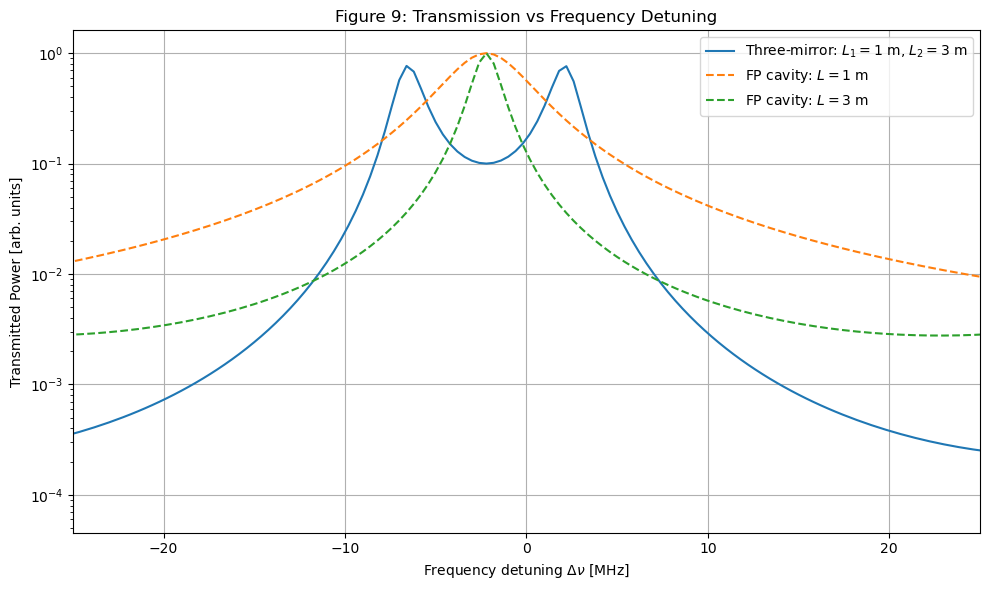

In [98]:
#Plots
plt.figure(figsize=(10, 6))
plt.semilogy(dnu*1e-6, T3, label='Three-mirror: $L_1=1$ m, $L_2=3$ m')
plt.semilogy(dnu*1e-6, TFP1, '--', label='FP cavity: $L=1$ m')
plt.semilogy(dnu*1e-6, TFP3, '--', label='FP cavity: $L=3$ m')

plt.xlabel("Frequency detuning $\\Delta\\nu$ [MHz]")
plt.ylabel("Transmitted Power [arb. units]")
plt.title("Figure 9: Transmission vs Frequency Detuning")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.xlim(-25,25)
plt.show()

In [43]:
#Compute spectra
T3_2 = T_three_mirror(k, 2,2,r,r,r,t,t,t)
TFP_2 = T_fp(k,2,R,R,T,T)

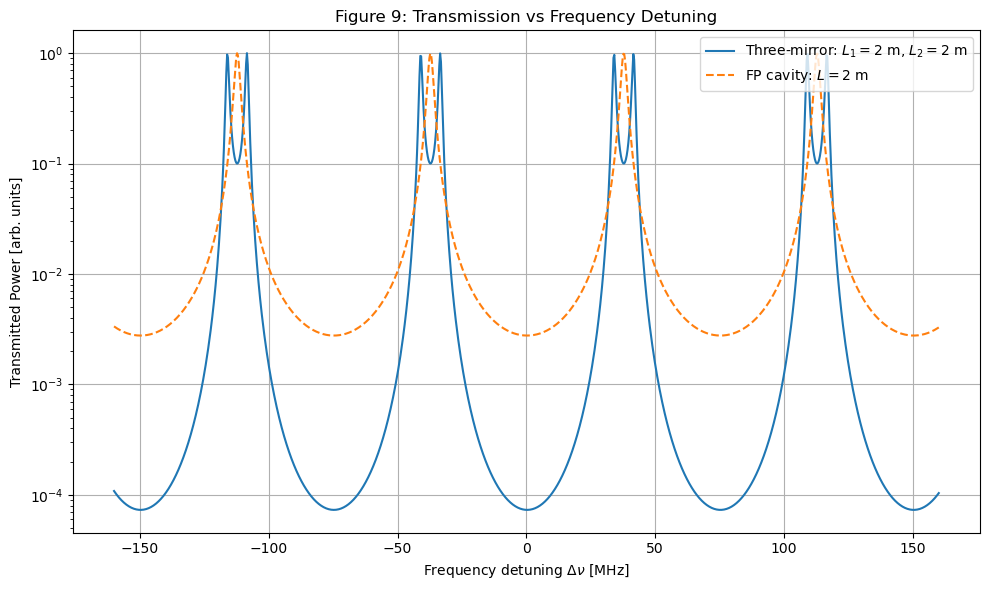

In [44]:
#Plots
plt.figure(figsize=(10, 6))
plt.semilogy(dnu*1e-6, T3_2, label='Three-mirror: $L_1=2$ m, $L_2=2$ m')
plt.semilogy(dnu*1e-6, TFP_2, '--', label='FP cavity: $L=2$ m')
#plt.semilogy(dnu*1e-6, TFP2, '--', label='FP cavity: $L=3$ m')

plt.xlabel("Frequency detuning $\\Delta\\nu$ [MHz]")
plt.ylabel("Transmitted Power [arb. units]")
plt.title("Figure 9: Transmission vs Frequency Detuning")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [99]:
#Mirror reflectivities and transmissivities (same for all mirrors)
R1,R2,R3 = 0.9, 0.9, 0.9999
T1, T2, T3 = 1-R1, 1-R2, 1-R3

r1, r2, r3 = np.sqrt(R1), np.sqrt(R2), np.sqrt(R3)
t1, t2, t3 = np.sqrt(T1), np.sqrt(T2), np.sqrt(T3)

#Sub-cavity lengths
L1 = 1.0
L2 = 3.0

In [100]:
#Compute spectra
T3_3 = T_three_mirror(k, L1, L2, r1,r2,r3,t1,t2,t3)
TFP_L_1 = T_fp(k, L1,R1,R3,T1,T3)
TFP_L_3 = T_fp(k, L2,R1,R3,T1,T3)

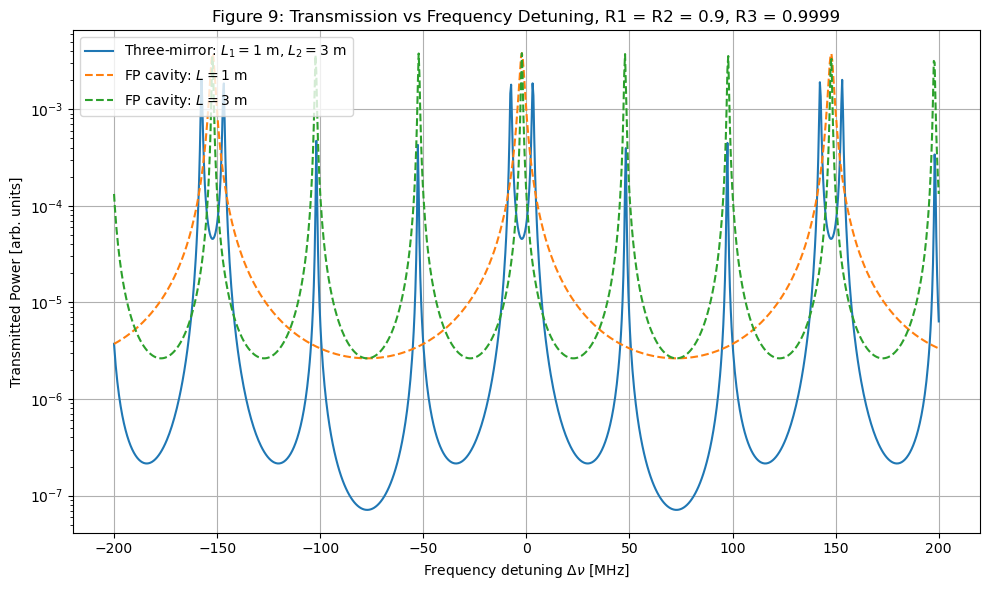

FP cavity L=2 m: max = 0.003790051411843425 , min = 2.6335470697234837e-06
FP cavity L=3 m: max = 0.003787616360440386 , min = 2.6335340706043453e-06


In [101]:
#Plots
dnu = np.linspace(-200e6, 200e6, 1000)
plt.figure(figsize=(10, 6))
plt.semilogy(dnu*1e-6, T3_3, label='Three-mirror: $L_1=1$ m, $L_2=3$ m')
plt.semilogy(dnu*1e-6, TFP_L_1, '--', label='FP cavity: $L=1$ m')
plt.semilogy(dnu*1e-6, TFP_L_3, '--', label='FP cavity: $L=3$ m')

plt.xlabel("Frequency detuning $\\Delta\\nu$ [MHz]")
plt.ylabel("Transmitted Power [arb. units]")
plt.title("Figure 9: Transmission vs Frequency Detuning, R1 = R2 = 0.9, R3 = 0.9999")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("FP cavity L=2 m: max =", np.max(TFP_L_1), ", min =", np.min(TFP_L_1))
print("FP cavity L=3 m: max =", np.max(TFP_L_3), ", min =", np.min(TFP_L_3))

In [59]:
fwhm_fp_2 = compute_fwhm(dnu * 1e-6, TFP_L_1)  # in MHz
fwhm_fp_3 = compute_fwhm(dnu * 1e-6, TFP_L_3)  # in MHz

print("FWHM of FP cavity L=1 m:", fwhm_fp_2, "MHz")
print("FWHM of FP cavity L=3 m:", fwhm_fp_3, "MHz")

FWHM of FP cavity L=1 m: 190.19019019019015 MHz
FWHM of FP cavity L=3 m: 313.11311311311306 MHz


- figure out what is needed to build first setup
- xhange transissitivty by 75%
